# Cramer's V correlation matrix 

We will see here how to create a matrix of correlation for categorical features with the Cramer's V

**Dataset import**

Source : https://www.kaggle.com/blastchar/telco-customer-churn

In [2]:
import pandas as pd
data = pd.read_csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv") 

**Keeping of categorical features**

In [3]:
data = data[[i for i in data.columns if i not in ('customerID','Churn','tenure','MonthlyCharges', 'TotalCharges')]]

data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


**Label encoding**

In [4]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in data.columns :
  data_encoded[i]=label.fit_transform(data[i])

In [5]:
data_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2


**Building of the Cramer's V function**

In [6]:
from scipy.stats import chi2_contingency
import numpy as np




def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return np.sqrt(stat/(obs*mini))

**Building of the matrix**

In [7]:
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)



df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
gender,1.00,0.00,0.00,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.02
SeniorCitizen,0.00,1.00,0.02,0.21,0.01,0.15,0.27,0.21,0.18,0.18,0.22,0.19,0.19,0.14,0.16,0.20
Partner,0.00,0.02,1.00,0.45,0.02,0.14,0.00,0.15,0.15,0.17,0.13,0.14,0.13,0.30,0.01,0.16
Dependents,0.01,0.21,0.45,1.00,0.00,0.03,0.18,0.19,0.16,0.16,0.18,0.15,0.14,0.24,0.11,0.15
PhoneService,0.01,0.01,0.02,0.00,1.00,1.00,0.45,0.18,0.17,0.17,0.18,0.18,0.18,0.00,0.02,0.01
MultipleLines,0.01,0.15,0.14,0.03,1.00,1.00,0.40,0.23,0.25,0.25,0.23,0.26,0.26,0.08,0.17,0.17
InternetService,0.01,0.27,0.00,0.18,0.45,0.40,1.00,0.72,0.71,0.71,0.72,0.72,0.72,0.21,0.38,0.31
OnlineSecurity,0.02,0.21,0.15,0.19,0.18,0.23,0.72,1.00,0.72,0.72,0.73,0.71,0.71,0.30,0.34,0.30
OnlineBackup,0.01,0.18,0.15,0.16,0.17,0.25,0.71,0.72,1.00,0.72,0.72,0.71,0.71,0.26,0.32,0.28
DeviceProtection,0.01,0.18,0.17,0.16,0.17,0.25,0.71,0.72,0.72,1.00,0.73,0.73,0.74,0.30,0.32,0.29


**Add a heatmap to the matrix**

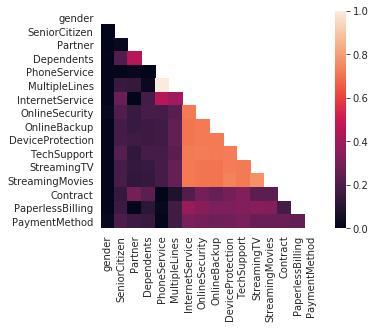

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt



mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True




with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True)

plt.show()
